## DAT Capstone Project 

**Student name: Ravinarayan Raghupathi, MSc PhD**

**Instructor name: Hardik Idnani**

In [1]:
#Import all required packages#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

## Background
<p> 
     <div align="justify">
Proteins are naturally occurring complex biological molecules that perform a variety of essential functions in living organisms. They are polymers of amino acids joined together by chemical bonds and the sequence of the amino acid residues determine each protein's unique structure and function.
    <br>
    <br>
The tertiary structure of a protein is its three-dimensional (3D) folded shape and is defined by its atomic co-ordinates. The amino acid residues in the folded protein can be hidden or exposed. Analysing where these residues are in the final 3D shape is of key importance in understanding protein function.
        </div>
    <br>
    <br>
    <div align="center">
<b>3D STRUCTURE OF A PROTEIN</b>
                  
    ![Prot_struc](./Images/prot_struc.png)
    
    ![prot_struc.png](attachment:prot_struc.png)
        </div>
   
   <div align="right">
<i>(Image source:pngwing.com)</i>
        </div> 
    <br>
    <br>
     <div align = "justify">
The prediction of a protein's tertiary structure is crucial in understanding protein-drug, protein-protein interactions, etc., and remains one of the most challenging exercises in bioinformatics, because of the number of variables involved. Over the last decade or so, machine-learning and other soft-computing techniques have become popular tools in protein structure prediction. 
        </div>

## Overview
###  Scientific problem:
<p>
<div align="justify">
Will regression analysis be able to determine which physicochemical factors are important in predicting the tertiary structure of a protein?
    </div>

### My strategy
<p>
  <div align="justify">
Here I use multilinear regression analysis of a freely available dataset that includes 9 physicochemical properties (the independent variables) to assess their effect on predicting the dependent variable RMSD (Root Mean Square Deviation) of residue size (ranging from 0 to 21 Ångströms) in a decoy set. Decoys are computer-generated tertiary structures for a given amino acid sequence. All the variables are numerical and continuous and there are no categorical variables present in the dataset. The data was originally obtained from the Critical Assessment of protein Structure Prediction (CASP) 5 to 9 experiments.
    </div>
    
### Source of data

(http://archive.ics.uci.edu/dataset/265/physicochemical+properties+of+protein+tertiary+structure)

### Brief description of variables in the dataset:
RMSD: Size of the residue.

F1: Total surface area.

F2: Non polar exposed area.

F3: Fractional area of exposed non polar residue.

F4: Fractional area of exposed non polar part of residue.

F5: Molecular mass weighted exposed area.

F6: Average deviation from standard exposed area of residue.

F7: Euclidean distance.

F8: Secondary structure penalty.

F9: Spatial Distribution constraints (N,K Value).

### Step 1: Exploratory data analysis
<p>
<div align="justify">
Analyse the given dataset to create a dataframe, check for NaN and unique values, check distribution and linearity of variables and eliminate outliers if required 
    </div>

In [2]:
#Creating the first dataframe#

df1=pd.read_csv('./Data/CASP.csv')
df1.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [4]:
#Checking shape of df1#
display (df1.shape)

#Checking for NaN values in df1#
display(df1.isna().values.any())

#Checking number of unique values for each variable#
count = df1.nunique()
display(count)

(45730, 10)

False

RMSD    15903
F1      39916
F2      39863
F3      20089
F4      40374
F5      41868
F6      39155
F7      39450
F8        341
F9      37299
dtype: int64

In [5]:
#Getting the statistics for df1#
df1.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


#### Distribution of predictors
Check how the predictors are distributed using combined KDE and histogram plots.

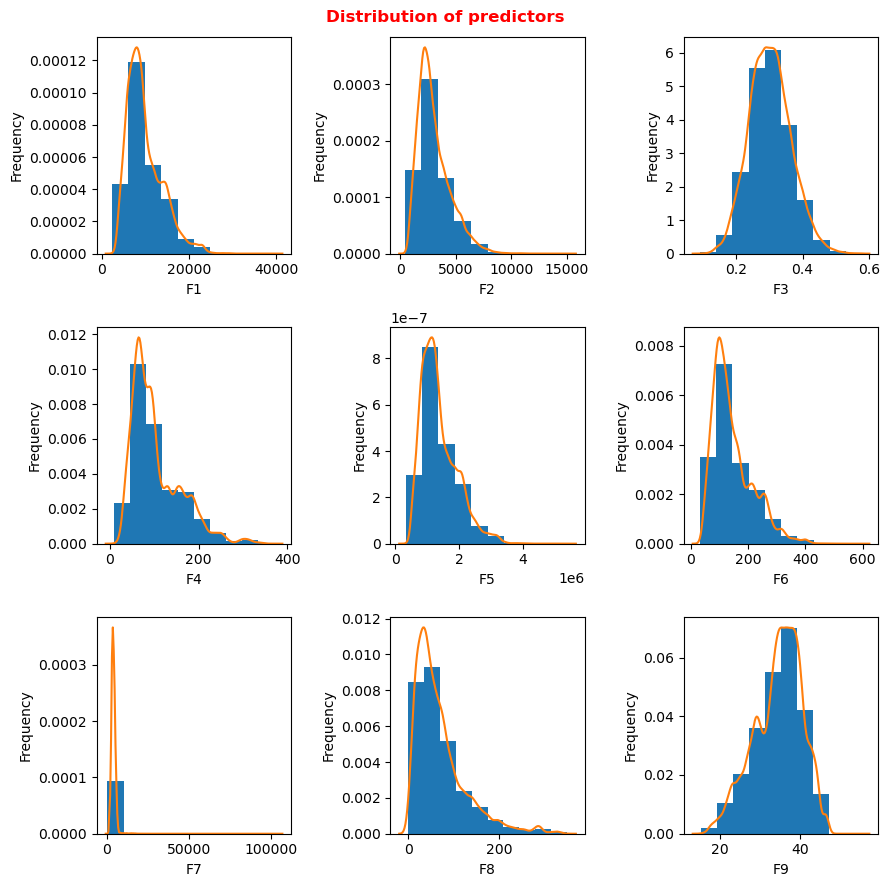

In [6]:
#Visualising distribution of predictors with combined KDE and Histogram#
fig, (axs1, axs2,axs3) = plt.subplots(figsize=(9,9), nrows=3, ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

y=df1.RMSD
x1=df1.F1
x2=df1.F2
x3=df1.F3
x4=df1.F4
x5=df1.F5
x6=df1.F6
x7=df1.F7
x8=df1.F8
x9=df1.F9

x1.plot.hist(ax=ax1, density=True)
sns.kdeplot(ax=ax1,data=x1)
x2.plot.hist(ax=ax2, density=True)
sns.kdeplot(ax=ax2,data=x2)
x3.plot.hist(ax=ax3, density=True)
sns.kdeplot(ax=ax3,data=x3)
x4.plot.hist(ax=ax4, density=True)
sns.kdeplot(ax=ax4,data=x4)
x5.plot.hist(ax=ax5, density=True)             
sns.kdeplot(ax=ax5,data=x5)
x6.plot.hist(ax=ax6, density=True)             
sns.kdeplot(ax=ax6,data=x6)
x7.plot.hist(ax=ax7, density=True)             
sns.kdeplot(ax=ax7,data=x7)
x8.plot.hist(ax=ax8, density=True)            
sns.kdeplot(ax=ax8,data=x8)
x9.plot.hist(ax=ax9, density=True)            
sns.kdeplot(ax=ax9,data=x9)

plt.suptitle("Distribution of predictors", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/KDE_Hist_check_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Distribution of dependent variable
Check how the dependent variable is distributed using a combined KDE and histogram plot.

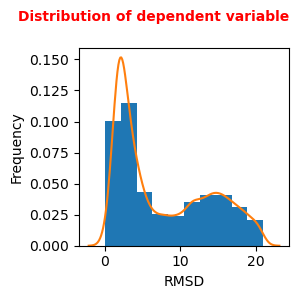

In [7]:
#Visualising distribution of dependent variable#
fig,ax=plt.subplots(figsize=(3,3))

y.plot.hist(ax=ax, density=True)
sns.kdeplot(ax=ax,data=y)

plt.suptitle("Distribution of dependent variable", color='red', fontsize = 10, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Dep_KDE_Hist_check_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Linearity check
Use scatter plots to check the relationship between the dependent and the independent variables.

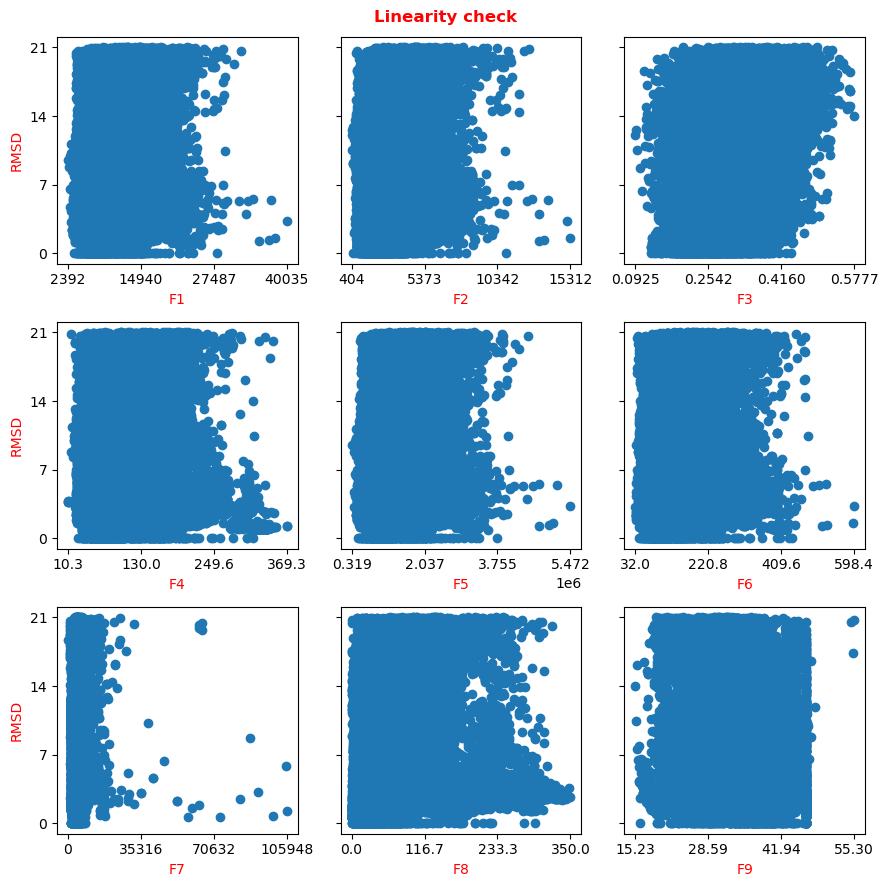

In [8]:
#Visualising linearity between independent and dependent variables#

fig, (axs1, axs2, axs3) = plt.subplots(figsize=(9,9), nrows= 3, ncols=3, sharey=True)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 =axs3

plt.ticklabel_format(style='plain')

ax1.scatter(x1,y)
ax1.set_xlabel('F1', c="r")
ax1.set_ylabel('RMSD',c="r")
xticks1 = np.linspace(start=min(x1), stop=max(x1), num=4)
yticks1 = np.linspace(start=min(y), stop=max(y), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(x2,y)
ax2.set_xlabel('F2', c="r")
xticks2 = np.linspace(start=min(x2), stop=max(x2), num=4)
yticks2 = np.linspace(start=min(y), stop=max(y), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(x3,y)
ax3.set_xlabel('F3', c="r")
xticks3 = np.linspace(start=min(x3), stop=max(x3), num=4)
yticks3 = np.linspace(start=min(y), stop=max(y), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

ax4.scatter(x4,y)
ax4.set_xlabel('F4', c="r")
ax4.set_ylabel('RMSD',c="r")
xticks4 = np.linspace(start=min(x4), stop=max(x4), num=4)
yticks4 = np.linspace(start=min(y), stop=max(y), num=4)
ax4.set_xticks(xticks4)
ax4.set_yticks(yticks4)

ax5.scatter(x5,y)
ax5.set_xlabel('F5', c="r")
xticks5 = np.linspace(start=min(x5), stop=max(x5), num=4)
yticks5 = np.linspace(start=min(y), stop=max(y), num=4)
ax5.set_xticks(xticks5)
ax5.set_yticks(yticks5)

ax6.scatter(x6,y)
ax6.set_xlabel('F6', c="r")
xticks6 = np.linspace(start=min(x6), stop=max(x6), num=4)
yticks6 = np.linspace(start=min(y), stop=max(y), num=4)
ax6.set_xticks(xticks6)
ax6.set_yticks(yticks6)

ax7.scatter(x7,y)
ax7.set_xlabel('F7', c="r")
ax7.set_ylabel('RMSD',c="r")
xticks7 = np.linspace(start=min(x7), stop=max(x7), num=4)
yticks7 = np.linspace(start=min(y), stop=max(y), num=4)
ax7.set_xticks(xticks7)
ax7.set_yticks(yticks7)

ax8.scatter(x8,y)
ax8.set_xlabel('F8', c="r")
xticks8 = np.linspace(start=min(x8), stop=max(x8), num=4)
yticks8 = np.linspace(start=min(y), stop=max(y), num=4)
ax8.set_xticks(xticks8)
ax8.set_yticks(yticks8)

ax9.scatter(x9,y)
ax9.set_xlabel('F9', c="r")
xticks9 = np.linspace(start=min(x9), stop=max(x9), num=4)
yticks9 = np.linspace(start=min(y), stop=max(y), num=4)
ax9.set_xticks(xticks9)
ax9.set_yticks(yticks9)

plt.suptitle("Linearity check", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
It appears from the dataframe statistics and the linearity plots that there are definitely outliers in some independent variable columns that will need to be eliminated.
    </div>

#### Removal of outliers

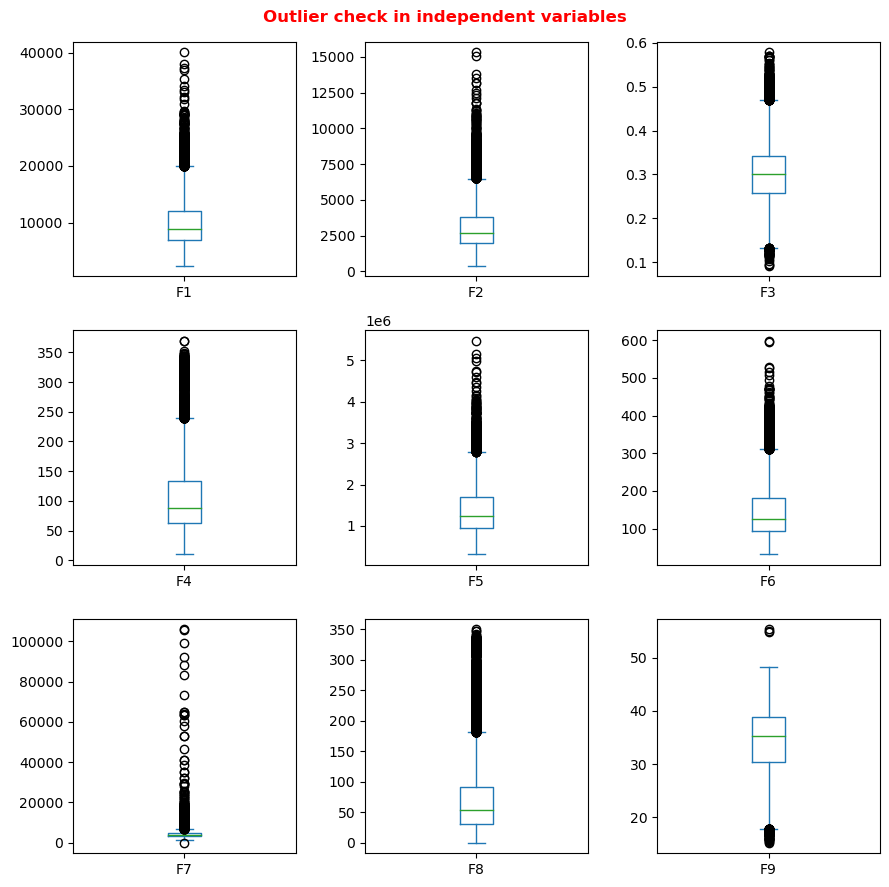

In [9]:
#Visualising outlier values in independent variables with boxplots#

fig,(axs1, axs2, axs3)=plt.subplots(figsize=(9,9),nrows=3, ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

x1.plot.box(ax=ax1)
x2.plot.box(ax=ax2)
x3.plot.box(ax=ax3)
x4.plot.box(ax=ax4)
x5.plot.box(ax=ax5)
x6.plot.box(ax=ax6)
x7.plot.box(ax=ax7)
x8.plot.box(ax=ax8)
x9.plot.box(ax=ax9)

plt.suptitle("Outlier check in independent variables", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
plt.savefig('Images/Outliers_check_boxplot.png',dpi=300,bbox_inches='tight')
plt.show()

In [10]:
# Removing outliers with IQR and creating new dataframe#
print('DF shape with outliers',  df1.shape)
     
cols = ['F1','F2','F3','F4','F5','F6','F7','F8','F9']

Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('DF shape after removing outliers',  df2.shape)

DF shape with outliers (45730, 10)
DF shape after removing outliers (41459, 10)


In [11]:
df2.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,41459.000000,41459.000000,41459.000000,41459.000000,41459.000000,4.145900e+04,41459.000000,41459.000000,41459.000000,41459.000000
mean,7.766480,9117.339400,2749.260475,0.299416,93.619470,1.265463e+06,132.387787,3742.477090,58.834294,35.417579
std,6.065987,3168.727533,1151.330998,0.061170,43.725481,4.449418e+05,54.724187,952.455393,39.704148,5.207610
min,0.000000,2392.050000,513.410000,0.133140,10.310100,3.194902e+05,31.970400,1089.190000,0.000000,18.069600
25%,2.283000,6763.835000,1915.690000,0.256170,62.093050,9.290097e+05,92.135450,3109.020000,29.000000,32.164000
50%,5.195000,8559.520000,2537.730000,0.297510,82.777200,1.190385e+06,119.799000,3739.620000,49.000000,35.884600
75%,13.382500,11018.250000,3417.915000,0.340990,115.474500,1.533902e+06,163.541500,4416.135000,79.000000,39.104650
max,20.999000,19760.500000,6496.520000,0.469070,238.735000,2.786190e+06,311.197000,6854.930000,181.000000,48.202800


#### Checking distribution of independent variables after removing outliers

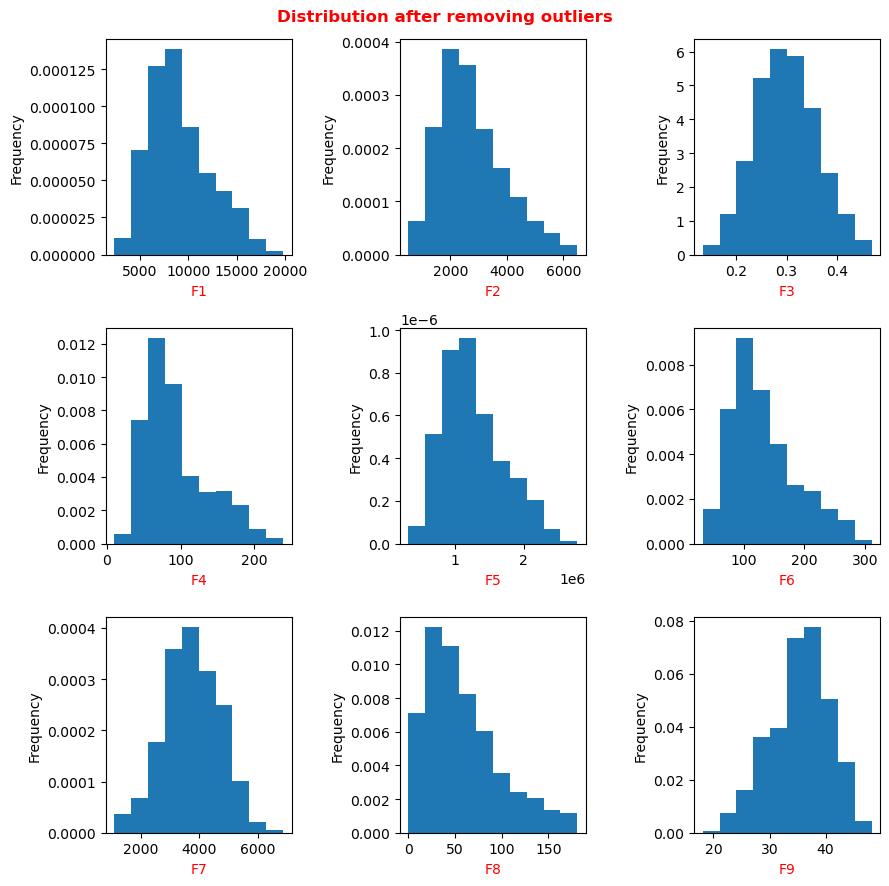

In [12]:
#Using histograms to visualise distribution of independent variables after removing outliers#
fig, (axs1,axs2,axs3)=plt.subplots(figsize=(9,9), nrows=3,ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

#Reassigning variables in df2#
y1=df2.RMSD
a1=df2.F1
a2=df2.F2
a3=df2.F3
a4=df2.F4
a5=df2.F5
a6=df2.F6
a7=df2.F7
a8=df2.F8
a9=df2.F9

a1.plot.hist(ax=ax1,density=True)
a2.plot.hist(ax=ax2,density=True)
a3.plot.hist(ax=ax3,density=True)
a4.plot.hist(ax=ax4,density=True)
a5.plot.hist(ax=ax5,density=True)
a6.plot.hist(ax=ax6,density=True)
a7.plot.hist(ax=ax7,density=True)
a8.plot.hist(ax=ax8,density=True)
a9.plot.hist(ax=ax9,density=True)

ax1.set_xlabel('F1',c='r')
ax2.set_xlabel('F2',c='r')
ax3.set_xlabel('F3',c='r')
ax4.set_xlabel('F4',c='r')
ax5.set_xlabel('F5',c='r')
ax6.set_xlabel('F6',c='r')
ax7.set_xlabel('F7',c='r')
ax8.set_xlabel('F8',c='r')
ax9.set_xlabel('F9',c='r')

plt.suptitle("Distribution after removing outliers", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
plt.savefig('Images/Dist_after_outlier_removal.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
The independent variables appear to be more normally distributed after the removal of outliers. 
    </div>

### Step 2: Baseline model (Iteration 1)
Perform multilinear Ordinary Least Squares (OLS) regression, create a baseline model and test assumptions of regression in that model.

#### Create the Baseline model

In [13]:
#Baseline model#

X1 = df2.drop('RMSD',axis=1)
y1 = df2['RMSD']
X1_int = sm.add_constant(X1)
model1 = sm.OLS(y1,X1_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RMSD   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1883.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:52:37   Log-Likelihood:            -1.2646e+05
No. Observations:               41459   AIC:                         2.529e+05
Df Residuals:                   41449   BIC:                         2.530e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9420      0.793      8.759      0.000       5.389       8.495
F1             0.0024      0.000     17.504      0.000       0.002       0.003
F2             0.0028      0.000     19.395      0.000       0.002       0.003
F3             5.3124      1.275      4.165      0.000       2.813       7.812
F4            -0.1294      0.002    -65.650      0.000      -0.133      -0.125
F5         -9.979e-06   8.52e-07    -11.716      0.000   -1.16e-05   -8.31e-06
F6            -0.0279      0.002    -13.764      0.000      -0.032      -0.024
F7            -0.0004   6.47e-05     -5.497      0.000      -0.000      -0.000
F8             0.0261      0.001     33.857      0.000       0.025       0.028
F9            -0.0688      0.013     -5.130      0.000      -0.095      -0.043
==============================================================================
Omnibus:                     1468.590   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1350.073
Skew:                           0.390   Prob(JB):                    6.84e-294
Kurtosis:                       2.583   Cond. No.                     7.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test assumptions of regression - Model 1
<p>
<div align="justify">
Check whether the model satisfies assumptions of linearity, homoskedasticity and normality.
    </div>

#### Linearity check

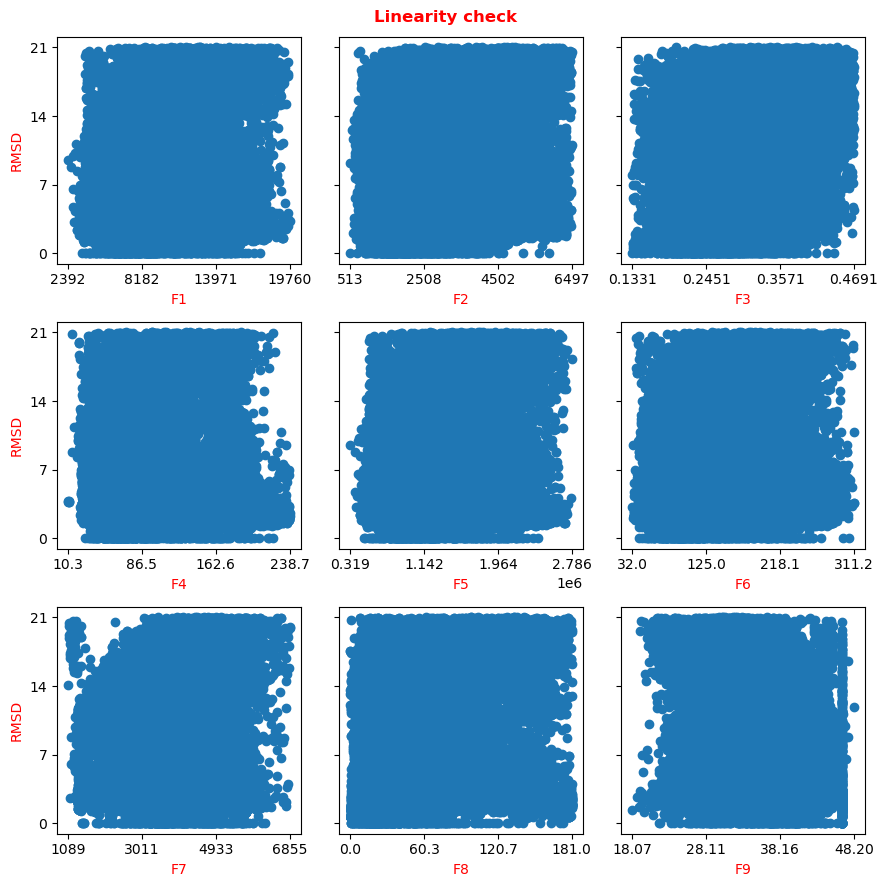

In [14]:
#Visualising linearity between independent and dependent variables#

fig, (axs1, axs2, axs3) = plt.subplots(figsize=(9,9), nrows= 3, ncols=3, sharey=True)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

plt.ticklabel_format(style='plain')

ax1.scatter(a1,y1)
ax1.set_xlabel('F1', c="r")
ax1.set_ylabel('RMSD',c="r")
xticks1 = np.linspace(start=min(a1), stop=max(a1), num=4)
yticks1 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(a2,y1)
ax2.set_xlabel('F2', c="r")
xticks2 = np.linspace(start=min(a2), stop=max(a2), num=4)
yticks2 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(a3,y1)
ax3.set_xlabel('F3', c="r")
xticks3 = np.linspace(start=min(a3), stop=max(a3), num=4)
yticks3 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

ax4.scatter(a4,y1)
ax4.set_xlabel('F4', c="r")
ax4.set_ylabel('RMSD',c="r")
xticks4 = np.linspace(start=min(a4), stop=max(a4), num=4)
yticks4 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax4.set_xticks(xticks4)
ax4.set_yticks(yticks4)

ax5.scatter(a5,y1)
ax5.set_xlabel('F5', c="r")
xticks5 = np.linspace(start=min(a5), stop=max(a5), num=4)
yticks5 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax5.set_xticks(xticks5)
ax5.set_yticks(yticks5)

ax6.scatter(a6,y1)
ax6.set_xlabel('F6', c="r")
xticks6 = np.linspace(start=min(a6), stop=max(a6), num=4)
yticks6 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax6.set_xticks(xticks6)
ax6.set_yticks(yticks6)

ax7.scatter(a7,y1)
ax7.set_xlabel('F7', c="r")
ax7.set_ylabel('RMSD',c="r")
xticks7 = np.linspace(start=min(a7), stop=max(a7), num=4)
yticks7 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax7.set_xticks(xticks7)
ax7.set_yticks(yticks7)

ax8.scatter(a8,y1)
ax8.set_xlabel('F8', c="r")
xticks8 = np.linspace(start=min(a8), stop=max(a8), num=4)
yticks8 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax8.set_xticks(xticks8)
ax8.set_yticks(yticks8)

ax9.scatter(a9,y1)
ax9.set_xlabel('F9', c="r")
xticks9 = np.linspace(start=min(a9), stop=max(a9), num=4)
yticks9 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax9.set_xticks(xticks9)
ax9.set_yticks(yticks9)

plt.suptitle("Linearity check", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Linearity_check_Model1.png',dpi=300,bbox_inches='tight')
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


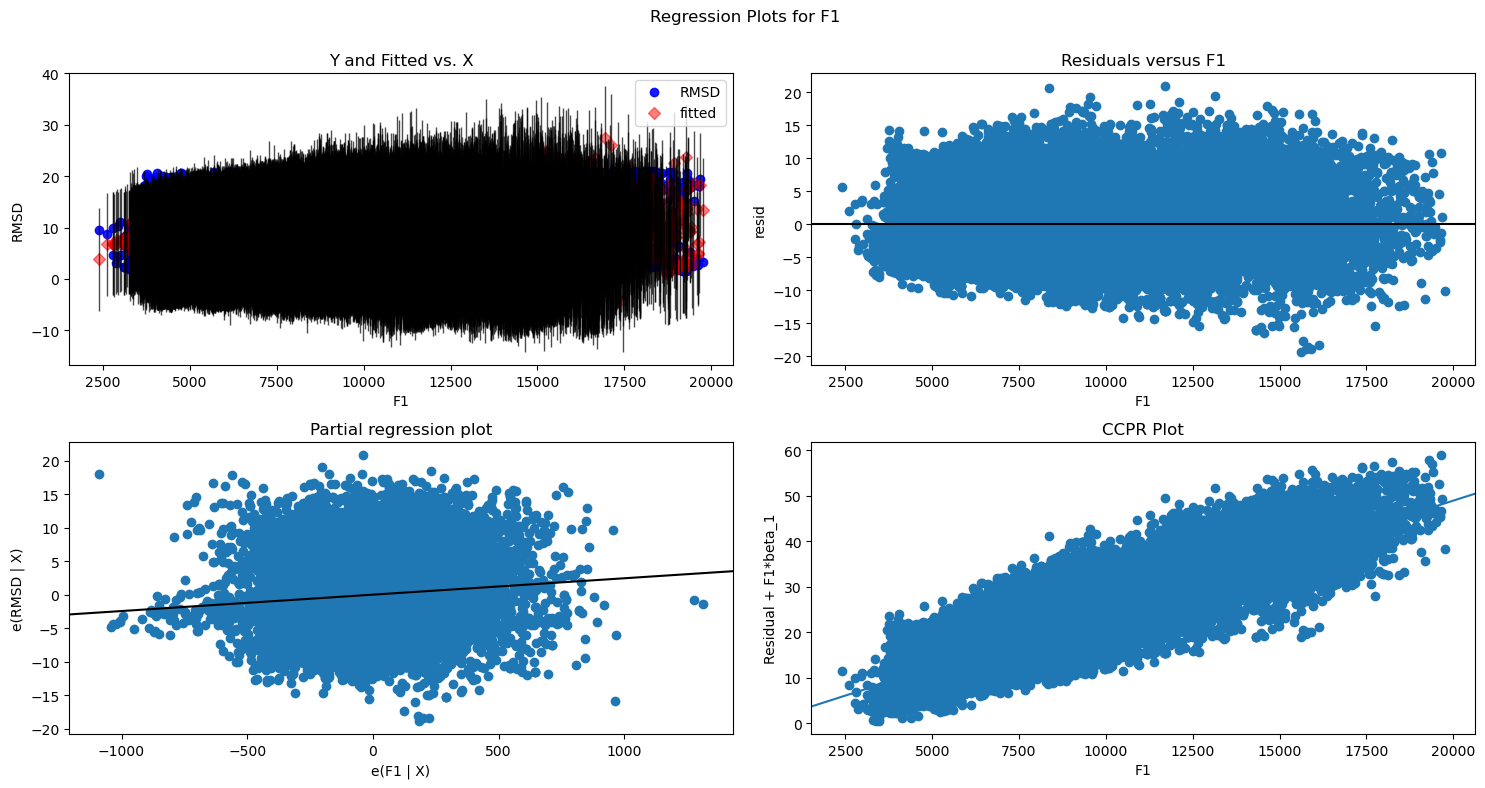

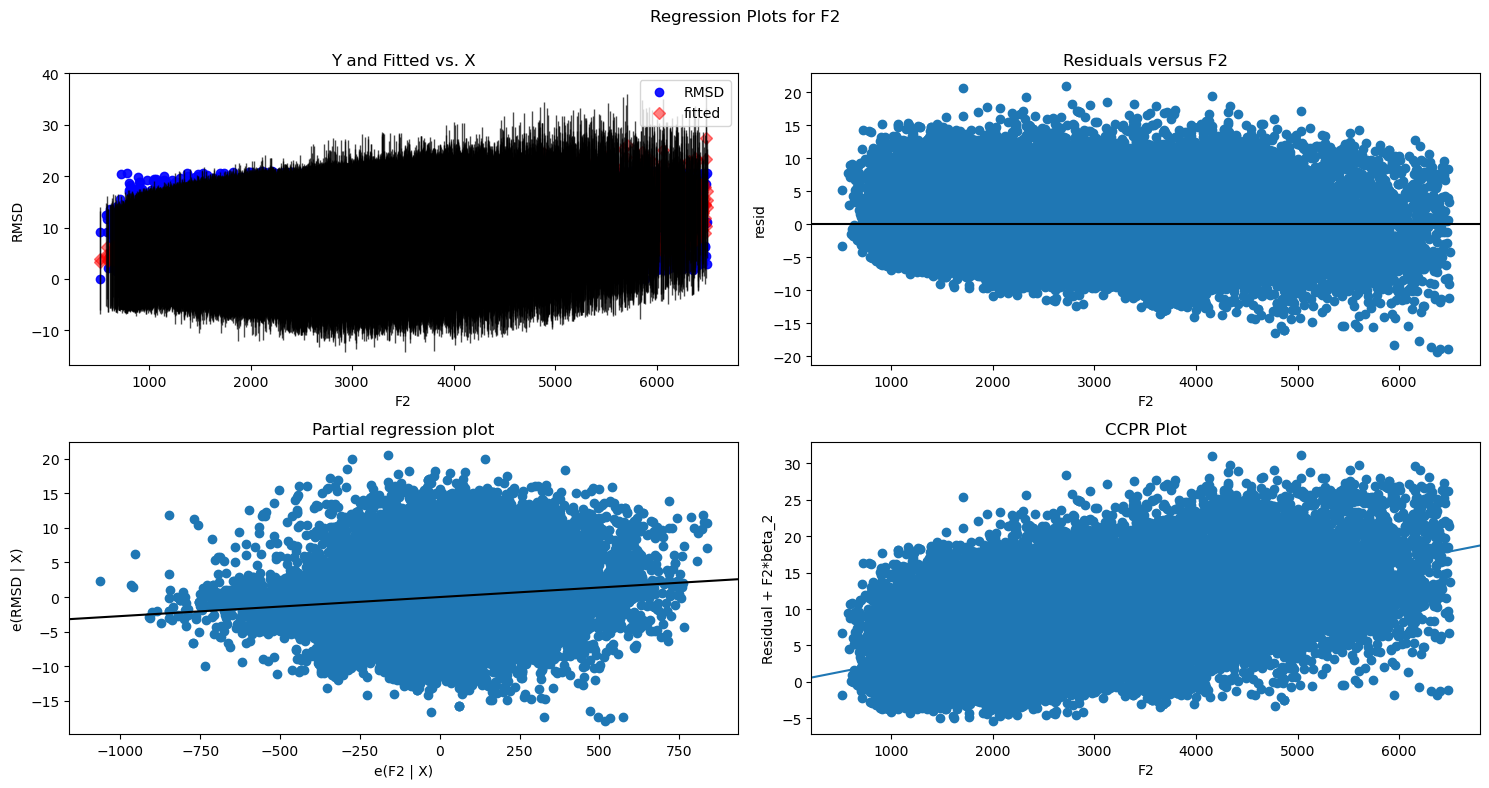

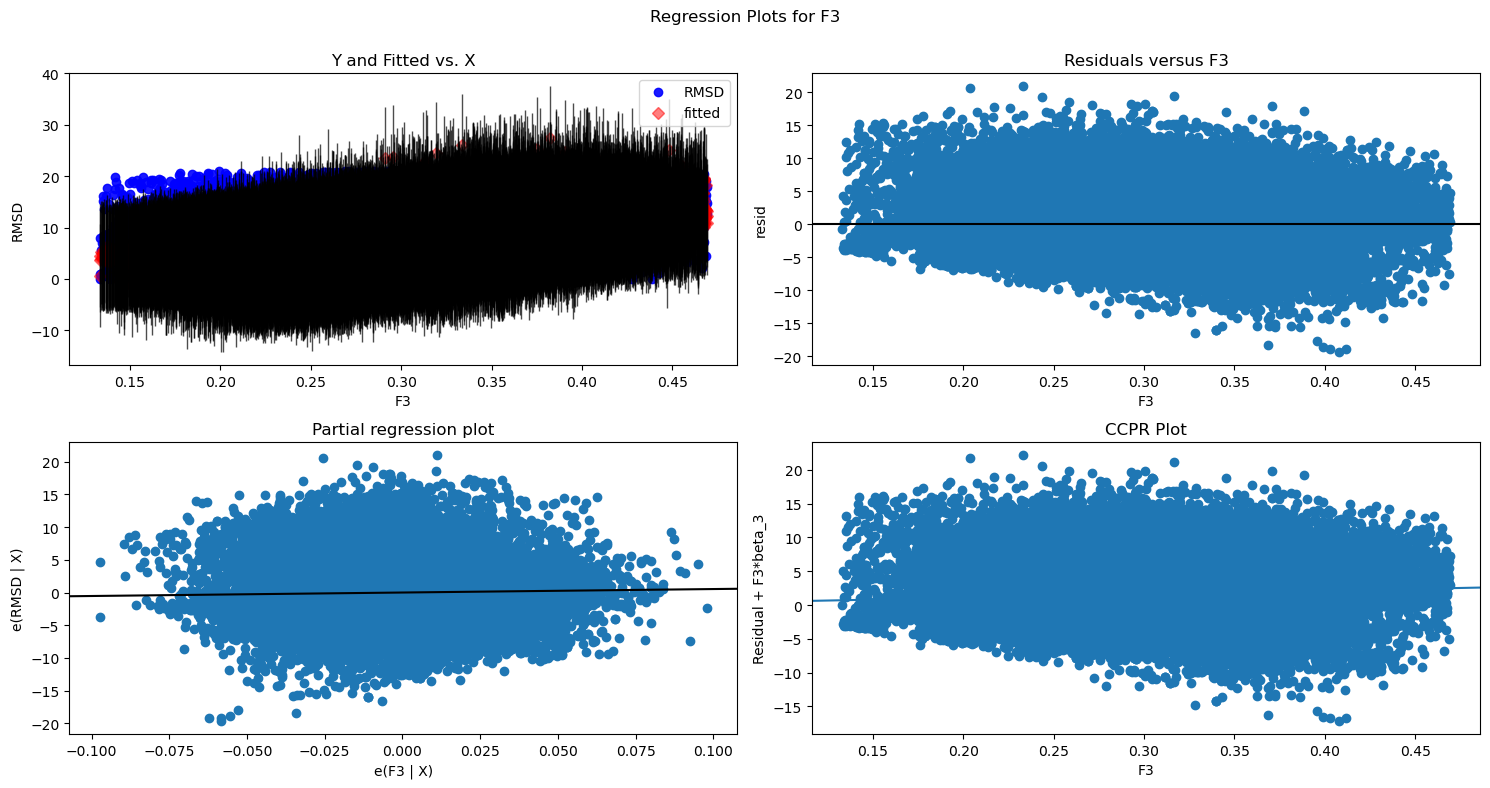

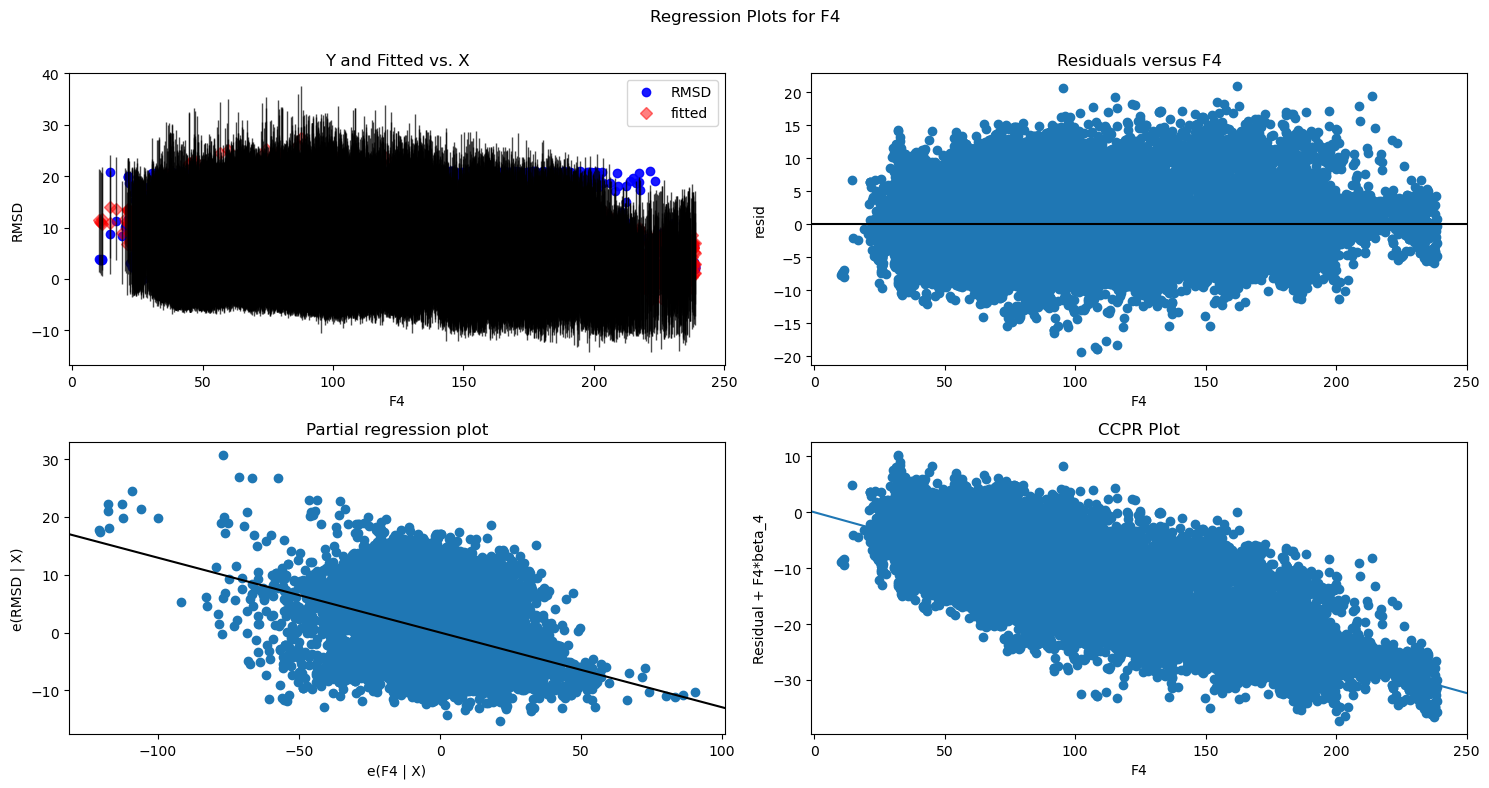

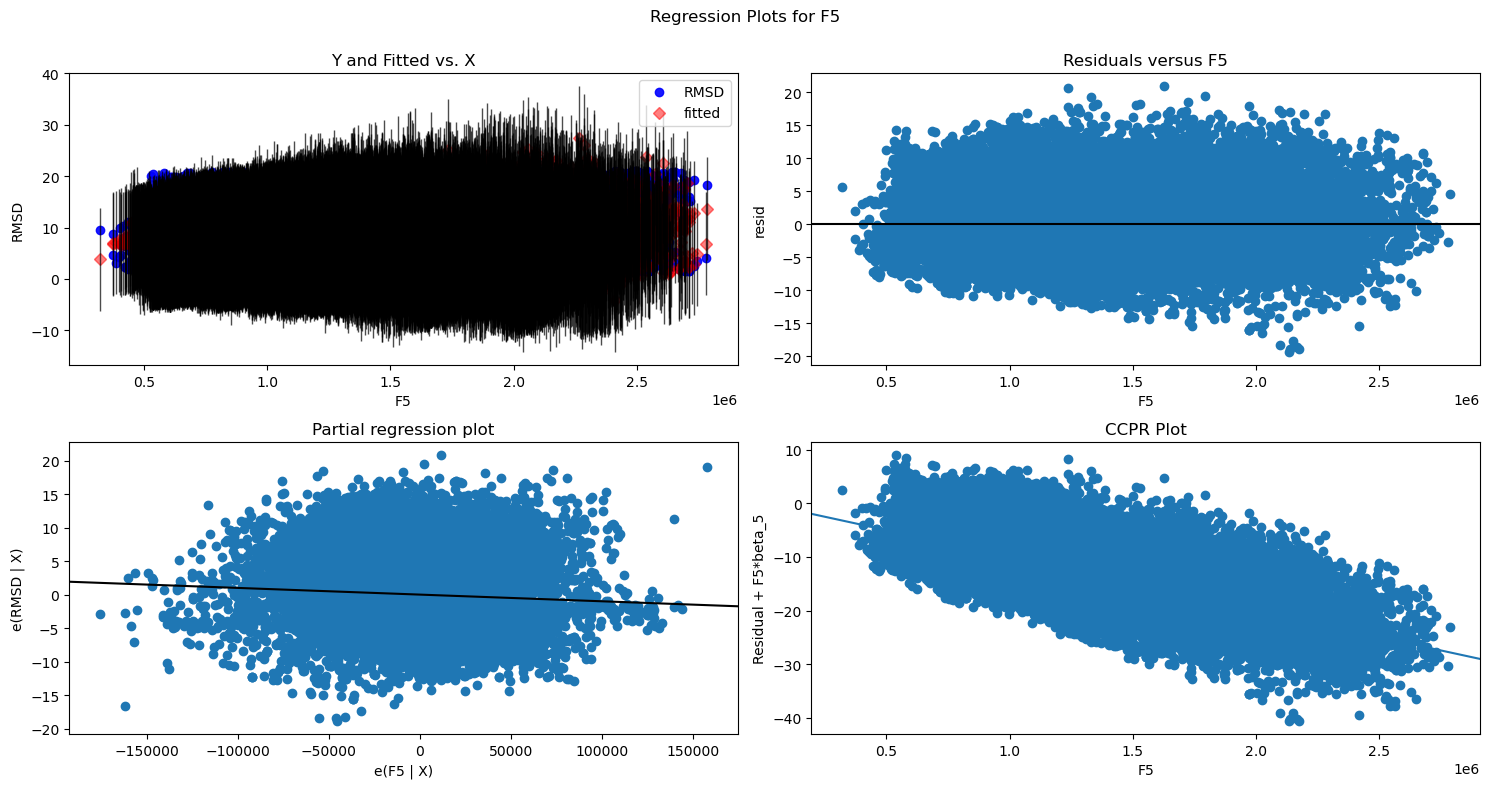

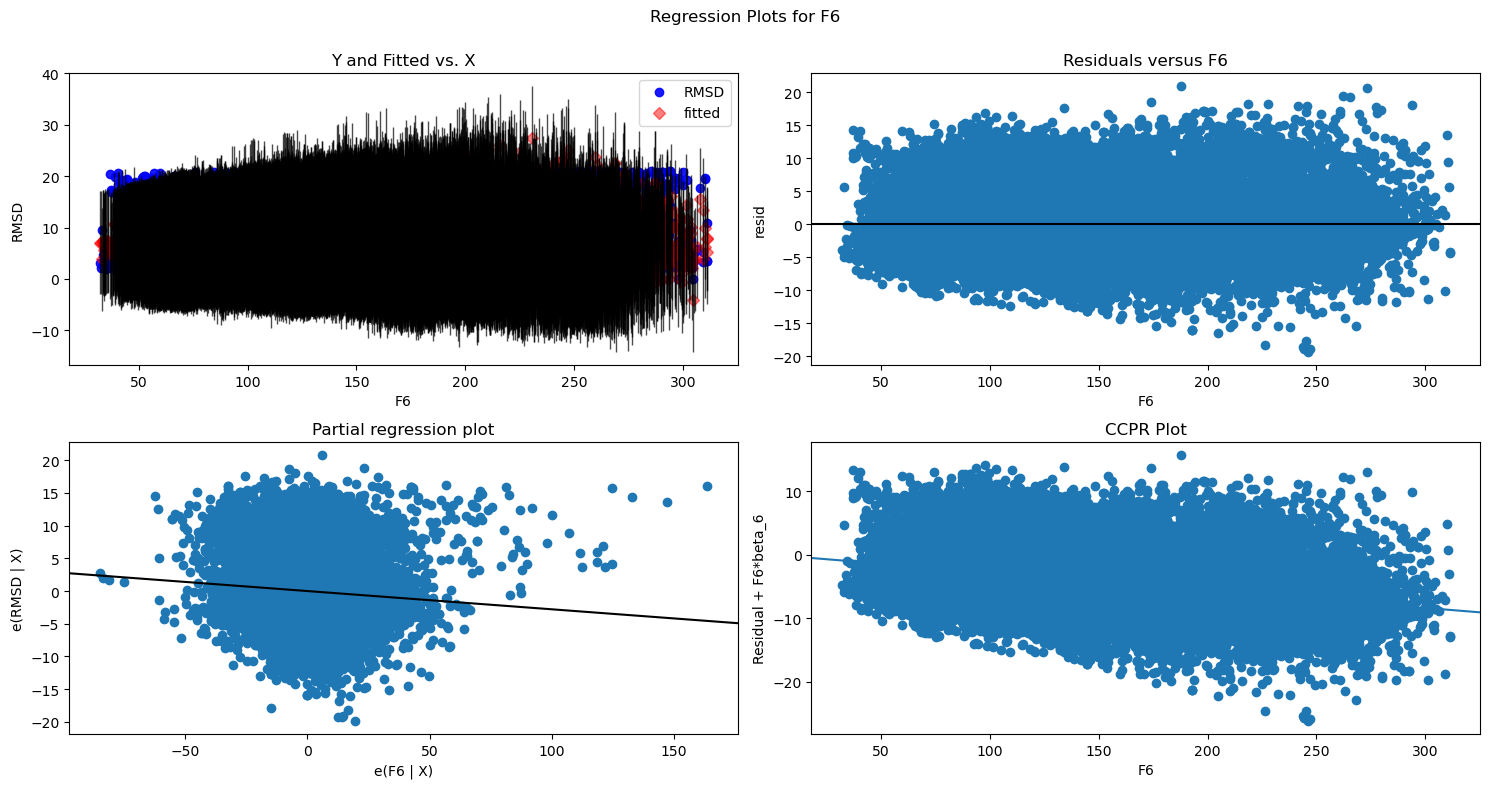

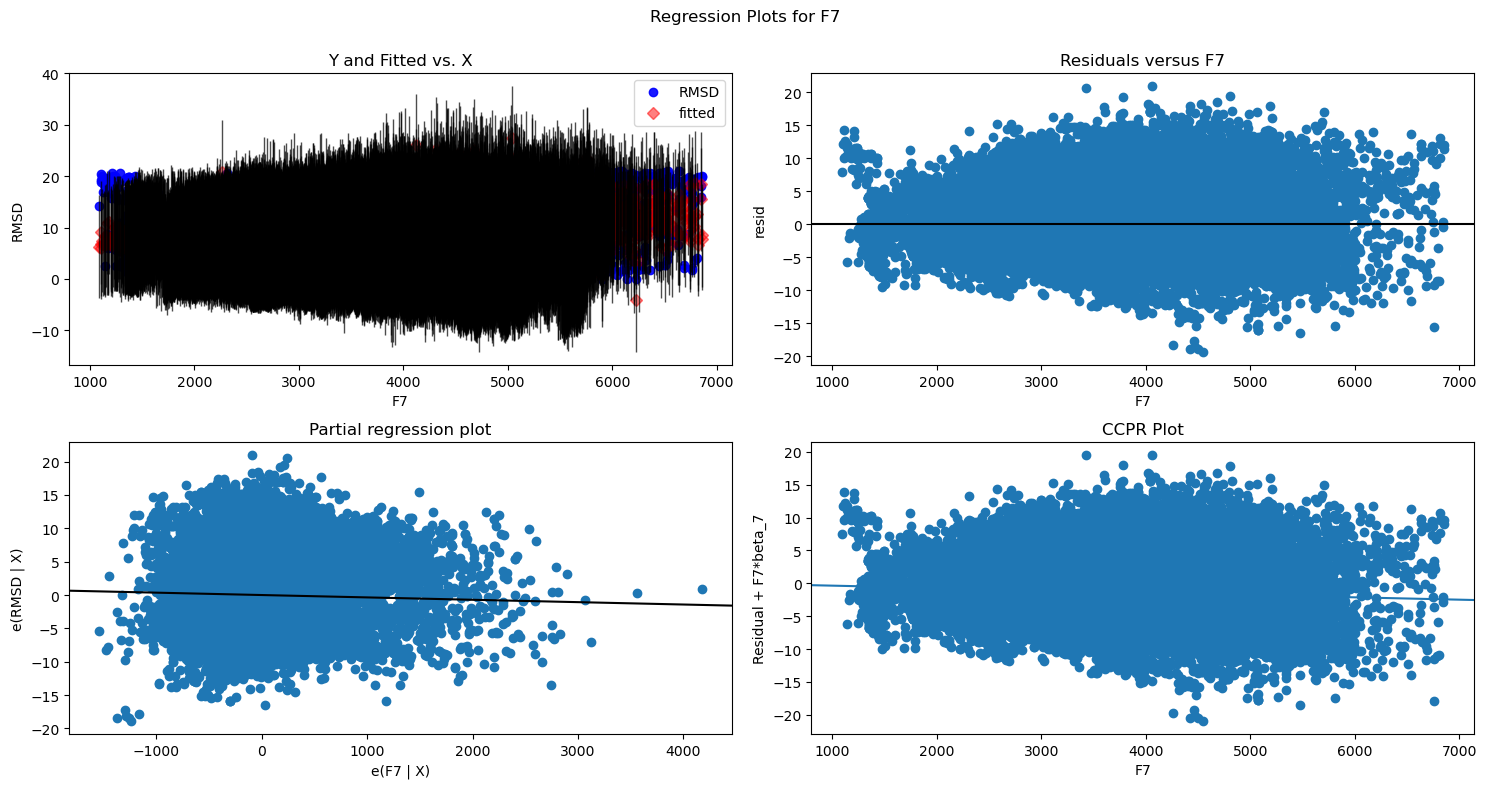

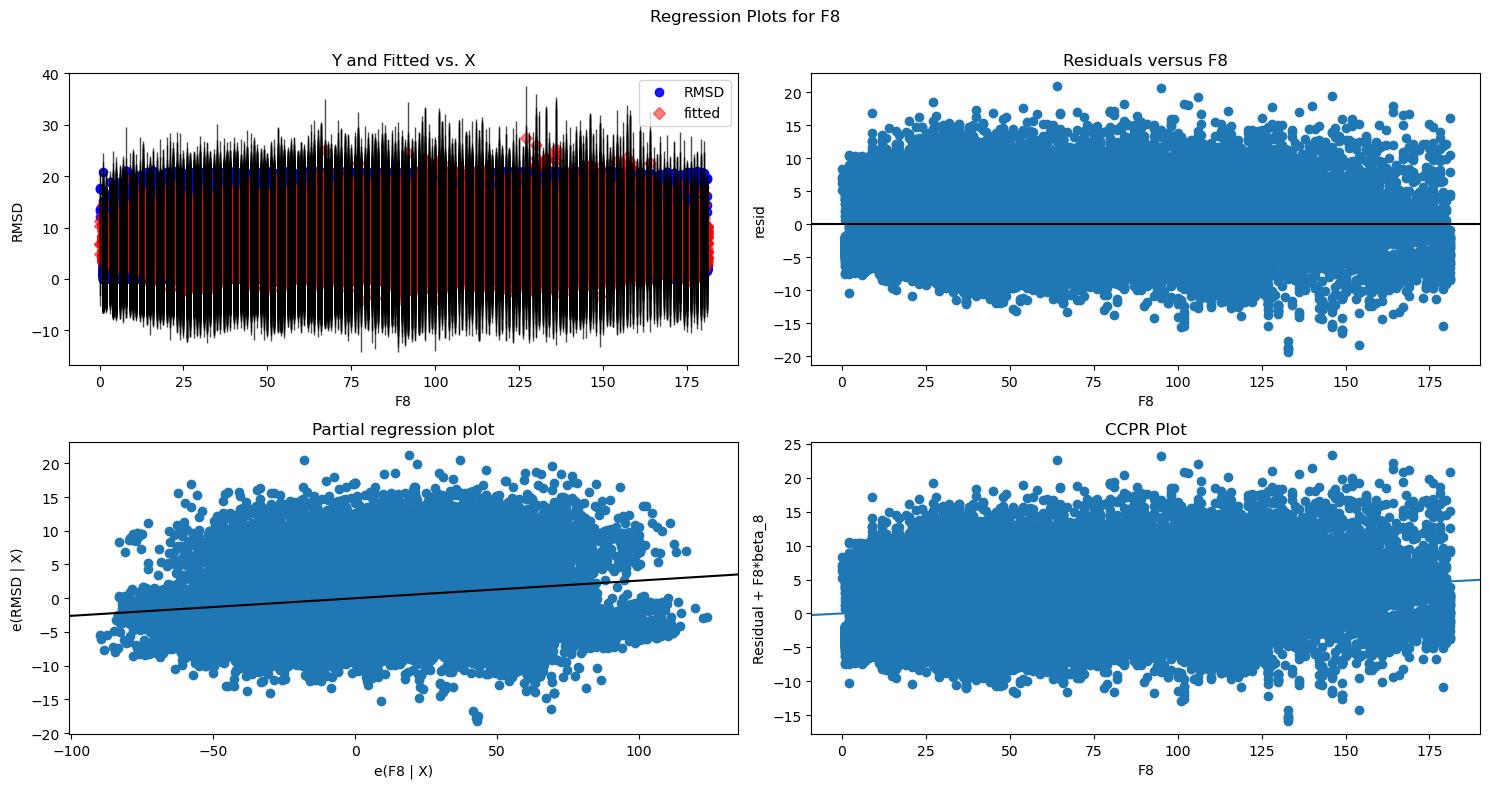

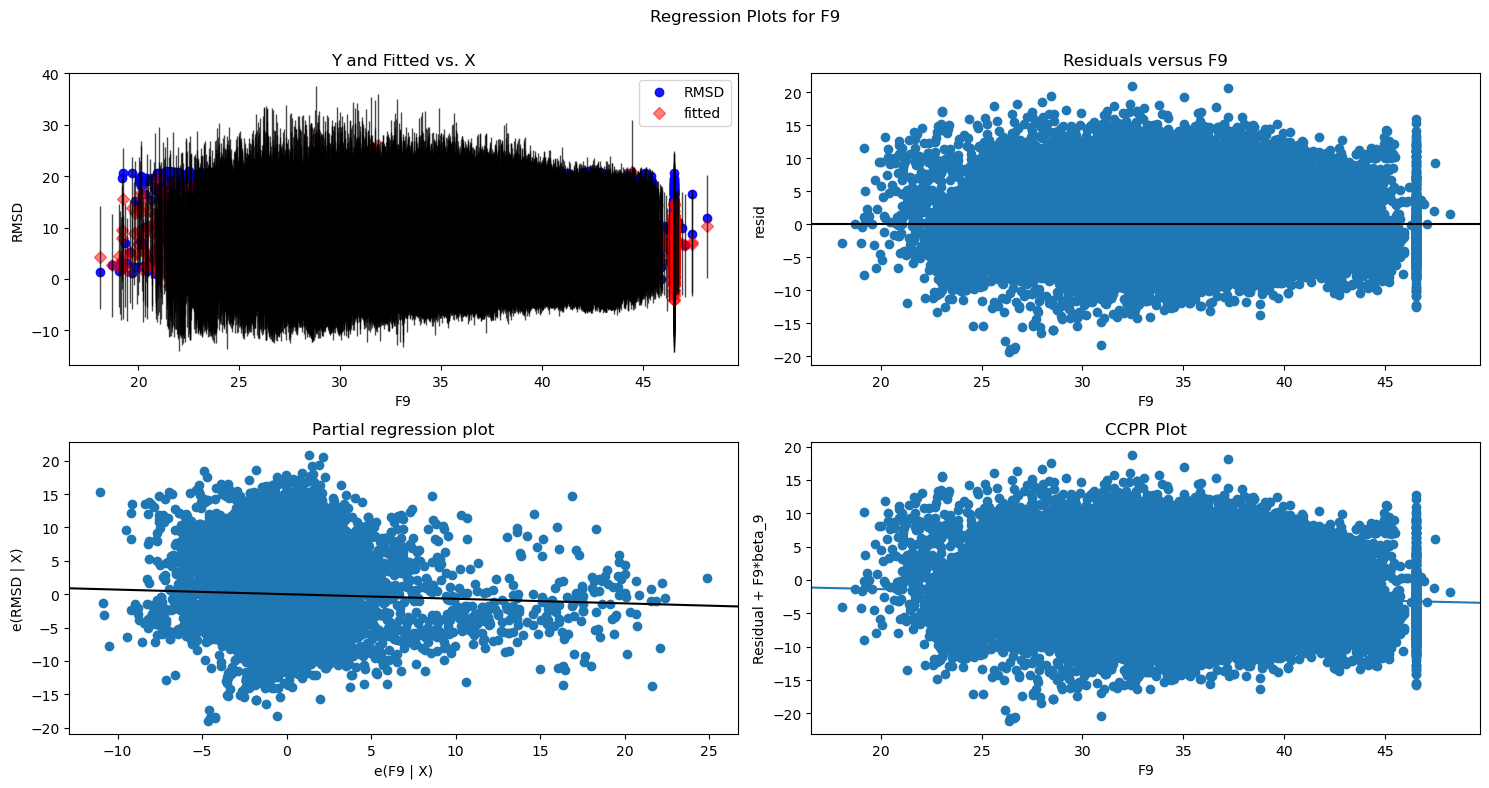

In [15]:
#Visualizing the error term for variance and skedasticity in baseline model#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F1",fig=fig)
plt.savefig('Images/Var_sked_Model1_F1.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F2",fig=fig)
plt.savefig('Images/Var_sked_Model1_F2.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F3",fig=fig)
plt.savefig('Images/Var_sked_Model1_F3.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F4",fig=fig)
plt.savefig('Images/Var_sked_Model1_F4.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F5",fig=fig)
plt.savefig('Images/Var_sked_Model1_F5.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F6",fig=fig)
plt.savefig('Images/Var_sked_Model1_F6.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F7",fig=fig)
plt.savefig('Images/Var_sked_Model1_F7.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F8",fig=fig)
plt.savefig('Images/Var_sked_Model1_F8.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F9",fig=fig)
plt.savefig('Images/Var_sked_Model1_F9.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

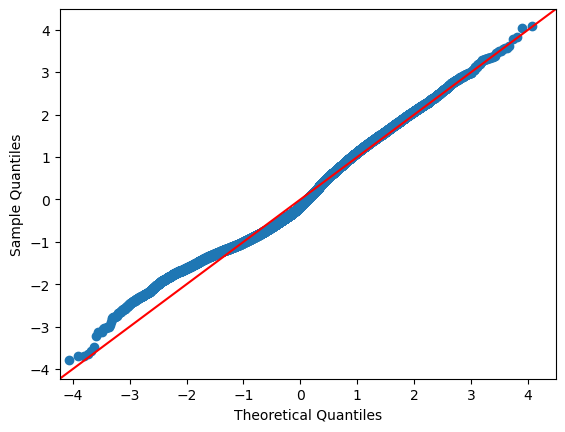

In [16]:
#Visualising Normality assumption in baseline model with a Q-Q plot#

residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model1_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations - Baseline model
<p>
    <div align="justify">
        
1. The adjusted R-squared value is very low (0.29) and indicates that variance in the independent variable can only be predicted less than 30% of the time.
     <br>
     <br>
2. The assumption for linearity is difficult to visualise (given the number of data points) but appears to be satisfactory. The assumptions for homoskedasticity and normality appear to be satisfied in this model.
    <br>
    <br>
3. The values for kurtosis and skewness are within acceptable limits but the high Condition number suggests multicollinearity, which will need to be examined and dealt with.
    </div>

### Step 3: Model 2 (Iteration 2)
<p>
<div align="justify">
Check for multicollinearity, transform variables, render revised model and retest assumptions of regression in the new model.
    </div>

#### Multicollinearity check
Check for multicollinearity and drop columns as required.

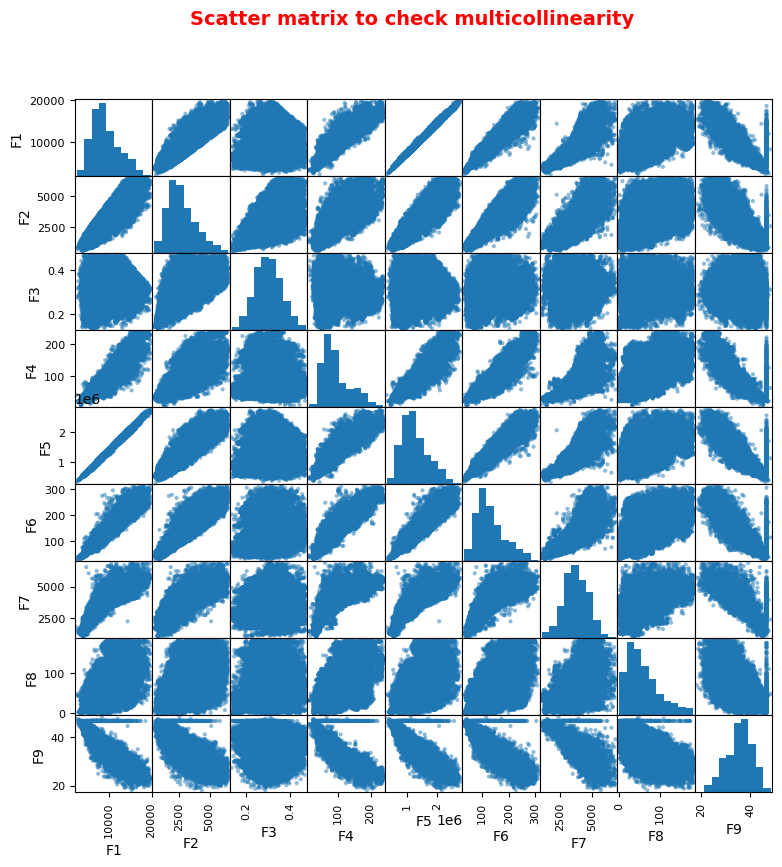

In [17]:
# Visualising multicollinearity with scatter matrix#

df2a=df2.iloc[:,1:10]
pd.plotting.scatter_matrix(df2a,figsize = [9,9]);
plt.suptitle("Scatter matrix to check multicollinearity", c="r", fontsize = 14, fontweight ="bold")
plt.savefig('Images/Multicoll_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

<div align ="justify">
It appears that there is definitely correlation between certain variables so it is advisable to look at a heatmap and correlation matrix and check for correlations greater than 0.75 before deciding to drop columns.
    </div>

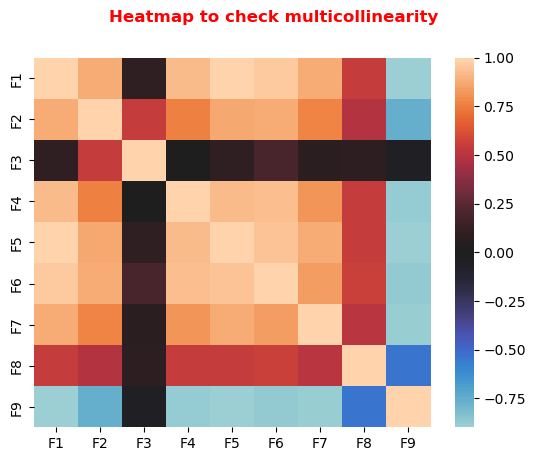

In [18]:
#Using a heatmap to decide which columns to drop#

sns.heatmap(df2a.corr(), center=0);
plt.suptitle("Heatmap to check multicollinearity", c="r", fontsize = 12, fontweight ="bold");
plt.savefig('Images/Multicoll_heatmap.png',dpi=300,bbox_inches='tight')

In [19]:
#Creating correlation matrix#
df2a.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
F1,1.000000,0.873979,0.099762,0.924580,0.997612,0.955536,0.881029,0.545494,-0.899317
F2,0.873979,1.000000,0.544233,0.756764,0.870333,0.878514,0.767933,0.487070,-0.765412
F3,0.099762,0.544233,1.000000,0.004246,0.097498,0.186107,0.078416,0.094231,-0.051498
F4,0.924580,0.756764,0.004246,1.000000,0.918710,0.931806,0.811636,0.547207,-0.878975
F5,0.997612,0.870333,0.097498,0.918710,1.000000,0.947902,0.878615,0.541300,-0.897541
F6,0.955536,0.878514,0.186107,0.931806,0.947902,1.000000,0.837585,0.556446,-0.874451
F7,0.881029,0.767933,0.078416,0.811636,0.878615,0.837585,1.000000,0.500373,-0.891432
F8,0.545494,0.487070,0.094231,0.547207,0.541300,0.556446,0.500373,1.000000,-0.538802
F9,-0.899317,-0.765412,-0.051498,-0.878975,-0.897541,-0.874451,-0.891432,-0.538802,1.000000


In [20]:
#Checking for correlations that are greater than 0.75 in the correlation matrix#
abs(df2a.corr()) > 0.75

,F1,F2,F3,F4,F5,F6,F7,F8,F9
F1,True,True,False,True,True,True,True,False,True
F2,True,True,False,True,True,True,True,False,True
F3,False,False,True,False,False,False,False,False,False
F4,True,True,False,True,True,True,True,False,True
F5,True,True,False,True,True,True,True,False,True
F6,True,True,False,True,True,True,True,False,True
F7,True,True,False,True,True,True,True,False,True
F8,False,False,False,False,False,False,False,True,False
F9,True,True,False,True,True,True,True,False,True


In [21]:
# Return any highly correlated pairs that are present in a new dataframe#

df2b=df2a.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2b['Pairs'] = list(zip(df2b.level_0, df2b.level_1))
df2b.set_index(['Pairs'], inplace = True)
df2b.drop(columns=['level_1', 'level_0'], inplace = True)
df2b.columns = ['Corr']
df2b.drop_duplicates(inplace=True)
df2b[(df2b.Corr>.75) & (df2b.Corr <1)]

,Corr
Pairs,
"(F1, F5)",0.997612
"(F6, F1)",0.955536
"(F6, F5)",0.947902
"(F6, F4)",0.931806
"(F4, F1)",0.924580
"(F5, F4)",0.918710
"(F9, F1)",0.899317
"(F5, F9)",0.897541
"(F9, F7)",0.891432


<div align="justify">
As can be seen from the analyses above, with the exception of the variables "F3' and 'F8', the remaining variables are all highly correlated with 6 other variables each. This would be expected, given that most of them represent measurements that are closely related. However, dropping any or more of these variables might not help in this particular regression analysis. It might be worth transforming some of the variables and seeing the effect on a new model.
    </div>

#### Log transformation of independent variables

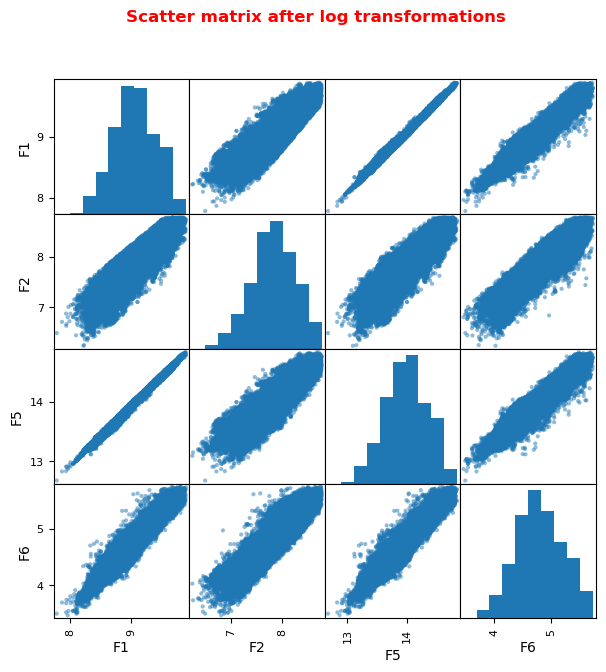

In [22]:
#Performing log transformation of independent variables within the dataframe#

df2c=df2.copy()
var_log = ['F1','F2','F5','F6']
for feat in var_log:
    df2c[feat] = df2c[feat].map(lambda x: np.log(x))

#Visualising transformed variables with a scatter matrix#
pd.plotting.scatter_matrix(df2c[var_log], figsize=(7,7));
plt.suptitle("Scatter matrix after log transformations", c="r", fontsize = 12, fontweight ="bold");
plt.savefig('Images/Log_transform_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
#Checking for NaN values in new dataframe#

df2c.isna().values.any()

False

<div align ="justify">
There is clearly still multicollinearity betweeen the transformed variables, as would be expected. Here I create a new model, to see if there is actually any improvement after variable transformation.
    </div>

#### Create Model 2

In [24]:
#Creating Model 2#

X2 = df2c.drop('RMSD',axis=1)
y2 = df2c['RMSD']
X2_int = sm.add_constant(X2)
model2 = sm.OLS(y2,X2_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RMSD   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1774.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:55:57   Log-Likelihood:            -1.2681e+05
No. Observations:               41459   AIC:                         2.536e+05
Df Residuals:                   41449   BIC:                         2.537e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.2812      5.432    -10.362      0.000     -66.927     -45.635
F1            55.8965      1.513     36.955      0.000      52.932      58.861
F2           -17.7407      0.865    -20.511      0.000     -19.436     -16.045
F3            94.8443      3.027     31.336      0.000      88.912     100.777
F4            -0.1013      0.002    -62.960      0.000      -0.104      -0.098
F5           -20.2088      1.048    -19.291      0.000     -22.262     -18.156
F6            -7.4977      0.279    -26.871      0.000      -8.045      -6.951
F7            -0.0004   6.99e-05     -5.764      0.000      -0.001      -0.000
F8             0.0265      0.001     34.185      0.000       0.025       0.028
F9            -0.1017      0.014     -7.512      0.000      -0.128      -0.075
==============================================================================
Omnibus:                     1685.036   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1533.633
Skew:                           0.415   Prob(JB):                         0.00
Kurtosis:                       2.553   Cond. No.                     8.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing assumptions of regression - Model 2
<p>
    <div align="justify">
Given that there is almost no difference in the two models, there is no point in checking whether Model 2 satisfies the assumptions of linearity and homoskedasticity as they will likely be the same as before. However, checking the normality assumption will provide information about whether log transformation of some variables improved the Q-Q plot. 
        </div>

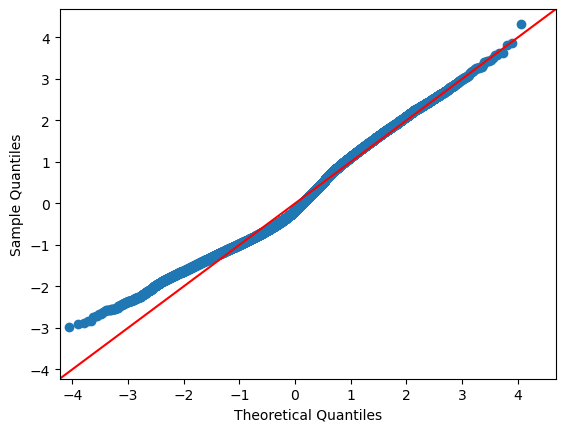

In [25]:
#Visualising the normality assumption in Model 2 with a Q-Q plot#

residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model2_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations: Model 2
<p>
    <div align = "justify">
        
1. There is no major difference between Models 1 and 2, in fact the statistics seem to have worsened. 
    <br>
    <br>
2. The normality plot has also worsened, indicating that Model 1 is better for further analysis. No futher tweaking of the variables will improve the regression modelling.
            </div>
<p>
  <div align="justify">
<b>Note: I performed several iterations by dropping various combinations of columns both before and after log transformation (not shown here). In no case was I able to improve upon Model 1 statistics and as pointed out above, most of the models were very poor and could not be used. Therefore I have chosen to go with Model 1 for validation. </b>
      </div>

### Step 4: Model validation
<p>
    <div align="justify">
Perform both Train-Test splits and Cross validation on the chosen model (in this case, Model 1). Compare the Mean Squared and R-Squared Error values across the splits, and compute the accuracy of the model.
      </div>

#### Train-Test split

In [26]:
#Performing train-test split#

y3=df2[['RMSD']]
X3=df2.drop(['RMSD'],axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
print('SIZES OF THE TRAIN-TEST SPLIT')
print()
print('Independent variables:','Training:', len(X3_train)," ",'Test:', len(X3_test))
print('Dependent variable:','Training:', len(y3_train)," ", 'Test:', len(y3_test))
print()

Prot = LinearRegression()
Prot.fit(X3_train,y3_train)
print ('PREDICTED OUTPUT:')
print()
print(Prot.predict(X3_test))
print()
print ('ACCURACY of MODEL:',Prot.score(X3_test,y3_test))

SIZES OF THE TRAIN-TEST SPLIT

Independent variables: Training: 33167   Test: 8292
Dependent variable: Training: 33167   Test: 8292

PREDICTED OUTPUT:

[[ 6.19456579]
 [16.14956125]
 [10.97386711]
 ...
 [20.78165121]
 [ 1.56176226]
 [ 6.64169364]]

ACCURACY of MODEL: 0.27546723825388264


In [27]:
#Getting Mean Squared Errors (MSE) for Train-Test split#

y_hat_train = Prot.predict(X3_train)
y_hat_test = Prot.predict(X3_test)
train_mse = mean_squared_error(y3_train, y_hat_train)
test_mse = mean_squared_error(y3_test, y_hat_test)
print('MSE VALUES FOR TRAIN-TEST SPLIT')
print ()
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

MSE VALUES FOR TRAIN-TEST SPLIT

Train Mean Squared Error: 26.03532253580084
Test Mean Squared Error: 26.457969613142502


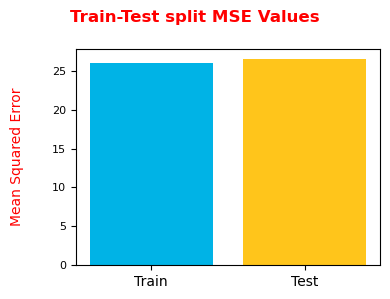

In [28]:
# Visualising MSE in train-test split#

M1=train_mse
M2=test_mse

labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]

fig, ax = plt.subplots(figsize=(4,3))
ax.bar(labels, [M1, M2], color=colors)
ax.set_ylabel("Mean Squared Error",c="r", labelpad=20)
ax.tick_params(axis='y', labelsize=8)
fig.suptitle("Train-Test split MSE Values", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Train_test_MSE.png',dpi=300,bbox_inches='tight')

In [29]:
#Getting the R-squared values for train-test split#

print('R-SQUARED VALUES FOR TRAIN-TEST SPLIT')
print()
print('Training data:',Prot.score(X3_train, y3_train))
print('Test data:',Prot.score(X3_test, y3_test))

R-SQUARED VALUES FOR TRAIN-TEST SPLIT

Training data: 0.293746567174051
Test data: 0.27546723825388264


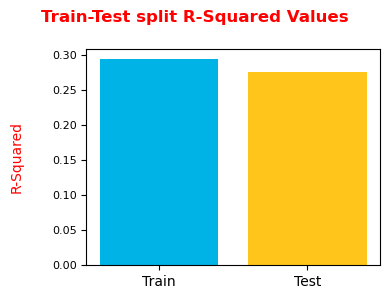

In [30]:
#Visualising R-Squared values in train-test split#

R1=Prot.score(X3_train, y3_train)
R2=Prot.score(X3_test, y3_test)

fig, ax = plt.subplots(figsize=(4,3))
ax.bar(labels, [R1, R2], color=colors)
ax.set_ylabel("R-Squared",c="r", labelpad=20)
ax.tick_params(axis='y', labelsize=8)
fig.suptitle("Train-Test split R-Squared Values", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Train_test_R2.png',dpi=300,bbox_inches='tight')

#### Cross validation

In [31]:
#Comparing MSE values for training and test data over 10 splits# 

cvr = cross_validate(Prot, X3, y3,cv=10, scoring="neg_mean_squared_error", return_train_score=True)
train_MSE = -cvr["train_score"]
test_MSE = -cvr["test_score"]

print('MSE VALUES FOR TRAINING AND TEST DATA OVER 10 SPLITS')
print ()
print('Training data:', train_MSE)
print()
print('Test data:',test_MSE)

MSE VALUES FOR TRAINING AND TEST DATA OVER 10 SPLITS

Training data: [26.04511859 26.17376051 26.17622209 26.17447891 26.13009541 26.07394556
 26.03721729 26.11543545 26.12730573 26.12556292]

Test data: [26.79308255 25.64307329 25.60707141 25.62537808 26.02826329 26.52869367
 26.86402297 26.15915975 26.05073163 26.06097087]


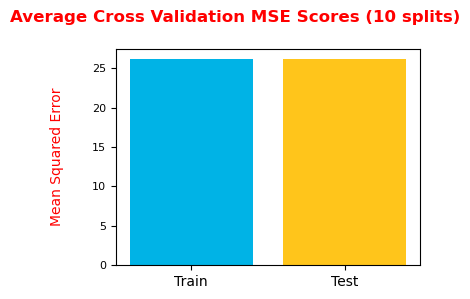

In [32]:
#Visualising mean cross validation MSE results#

train_avg = -cvr["train_score"].mean()
test_avg = -cvr["test_score"].mean()

fig, ax = plt.subplots(figsize=(4,3))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("Mean Squared Error",c="r", labelpad=20)
ax.tick_params(axis='y', labelsize=8)
fig.suptitle("Average Cross Validation MSE Scores (10 splits)", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Cross_val_MSE.png',dpi=300,bbox_inches='tight')

In [33]:
#Comparing R-Squared values for training and test data over 10 splits# 

cvr2 = cross_validate(Prot, X3, y3,cv=10, scoring="r2", return_train_score=True)
train1=cvr2["train_score"]
test1=cvr2["test_score"]

print('R-SQUARED VALUES FOR TRAINING AND TEST DATA OVER 10 SPLITS')
print ()
print('Training data:', train1)
print()
print('Test data:',test1)

R-SQUARED VALUES FOR TRAINING AND TEST DATA OVER 10 SPLITS

Training data: [0.29118179 0.28974301 0.28961719 0.29074527 0.29097718 0.29130492
 0.29055789 0.28826069 0.28946956 0.28992374]

Test data: [0.28077568 0.29339067 0.29442891 0.28418663 0.28205272 0.27945101
 0.28426216 0.30611949 0.29564787 0.29219254]


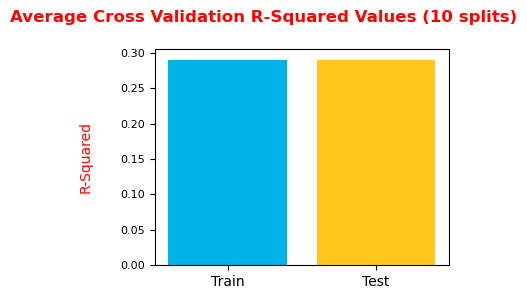

In [34]:
#Visualising cross validation average R-squared results over 10 splits#

train_avg = cvr2["train_score"].mean()
test_avg = cvr2["test_score"].mean()

fig, ax = plt.subplots(figsize=(4,3))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("R-Squared",c="r", labelpad=20)
ax.tick_params(axis='y', labelsize=8)
fig.suptitle("Average Cross Validation R-Squared Values (10 splits)", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Cross_val_R2.png',dpi=300,bbox_inches='tight')

   <div align="justify">
Scientific literature suggests that using Random Forest Regressor (RFR) modelling can help reduce the Mean Squared Error in a model and improve its accuracy. However, this requires significant computing power. I decided to run the RFR with the default settings to see if I could improve the modelling results.
    </div

#### Random Forest regression analysis

In [35]:
#Getting Random Forest Regressor Model MSE#

for_reg = RandomForestRegressor(random_state=42,n_jobs=16)
for_reg.fit(X3_train,y3_train)

forpred = for_reg.predict(X3_test)
for_mse = mean_squared_error(y3_test, forpred)

print('RANDOM FOREST REGRESSOR MODEL ERROR RESULTS')
print ()
print('Mean Squared Error:',for_mse)

C:\Users\ravin\AppData\Local\Temp\ipykernel_15972\706042596.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  for_reg.fit(X3_train,y3_train)


RANDOM FOREST REGRESSOR MODEL ERROR RESULTS

Mean Squared Error: 12.012106346138834


   <div align="justify">
It appears that baseline Random Forest regression has reduced the Mean Squared Error by more than half, compared to the Test data error results from both Train-Test and K-fold (Cross) validations.
    </div>

### Conclusions
<p>
    <div align="justify">
        
1. The multilinear regression model appears to be fitted well as evidenced by the significantly low differences in R-Squared and Mean Squared Error (MSE) values between the Train and Test datasets. However, the R-Squared value is too low to be considered statistically useful and the MSE values are still very high.
    <br>
    <br>
2. The model will predict correctly around 27% of the time, which is very low for the prediction accuracy that was the goal of this regression analysis.
    <br>
    <br>
3. I was able to reduce the MSE by around 50% by using the Random Forest Regressor. This might be the best approach to modelling data of the kind studied here, however it requires much more powerful computing resources than are available to me at this point.
        </div>

### Actionable insight
<p>  
  <div align="justify">
Multilinear regression analysis of physicochemical measurements might not be the best approach to predicting the tertiary structure of proteins, given that many of these measurements are likely to be highly correlated.
            </div>   